In [1]:
import os
from datetime import datetime
import gdown
import zipfile
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv(r'C:\Users\igomp\OneDrive\Desktop\Projects_Data_scince\chicago crime\chicago_crime_data\crime_ML.csv')

In [3]:
df.shape

(7335133, 14)

In [4]:
df.columns

Index(['Description', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'Latitude', 'Longitude', 'Risk Factor', 'Year', 'Month', 'Hour', 'Day',
       'DayOfWeek'],
      dtype='object')

In [5]:
df.drop(columns = ['Description'], axis = 1, inplace = True)

In [6]:
#Splitting to keep the test set aside 
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
train_subset = train_set.sample(n=150000, random_state=42)

In [8]:
df2 = train_subset.copy()

# Evaluation Function

In [9]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    conf_mat = confusion_matrix(y_test_encoded, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=label_encoder_y.classes_, yticklabels=label_encoder_y.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [10]:
# Define features and target variable for the subset
X_subset = df2.drop(columns=['Risk Factor'])
y_subset = df2['Risk Factor']

# Splitting the subset data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)


In [11]:
# Define categorical columns for label encoding
categorical_columns = ['Domestic', 'Beat', 'District', 'Ward', 
                       'Community Area', 'Month', 'Hour', 'Day', 'DayOfWeek']
label_encoders = {}

# Label Encoding for categorical features in the subset
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    X_test[col] = label_encoders[col].transform(X_test[col])

# Label Encoding for target in the subset
label_encoder_y = LabelEncoder()
y_train_encoded = label_encoder_y.fit_transform(y_train)
y_test_encoded = label_encoder_y.transform(y_test)

In [12]:
# Standard Scaling for numerical features in the subset
numerical_columns = ['Year','Latitude', 'Longitude']
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [13]:
# Apply SMOTE to handle class imbalance in the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train_encoded)

In [14]:

selected_features = ['Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'Latitude', 'Longitude', 'Year', 'Month', 'Hour', 'Day',
       'DayOfWeek']


In [15]:
# Selecting features for training from balanced data
X_train_selected = X_train_balanced[selected_features]
X_test_selected = X_test[selected_features]


Decision Tree Classifier:
Accuracy: 0.4093333333333333
Precision: 0.5767696202441083
Recall: 0.4093333333333333
F1 Score: 0.45556410752288445

Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.50      0.15      2139
           1       0.55      0.25      0.34     11044
           2       0.65      0.51      0.57     16817

    accuracy                           0.41     30000
   macro avg       0.43      0.42      0.35     30000
weighted avg       0.58      0.41      0.46     30000



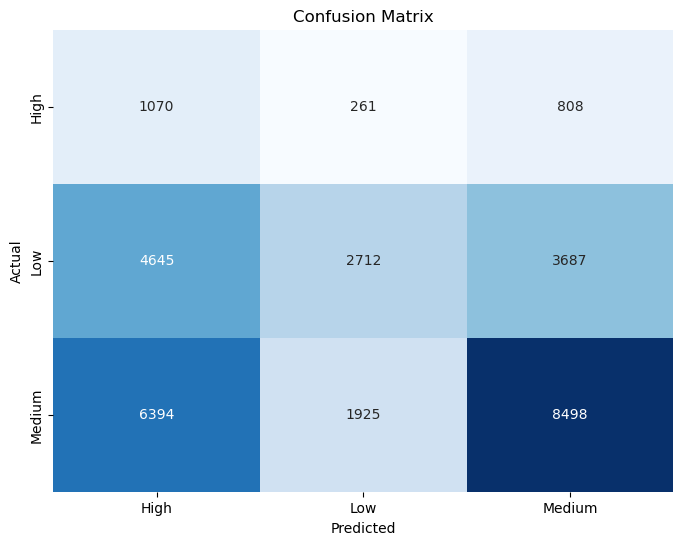

In [16]:
# Decision Tree Classifier
print("\nDecision Tree Classifier:")
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
evaluate_model(dt_classifier, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded)


Random Forest Classifier:
Accuracy: 0.5655333333333333
Precision: 0.567407112882814
Recall: 0.5655333333333333
F1 Score: 0.5664390828450577

Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.14      0.13      2139
           1       0.52      0.51      0.52     11044
           2       0.65      0.65      0.65     16817

    accuracy                           0.57     30000
   macro avg       0.43      0.44      0.43     30000
weighted avg       0.57      0.57      0.57     30000



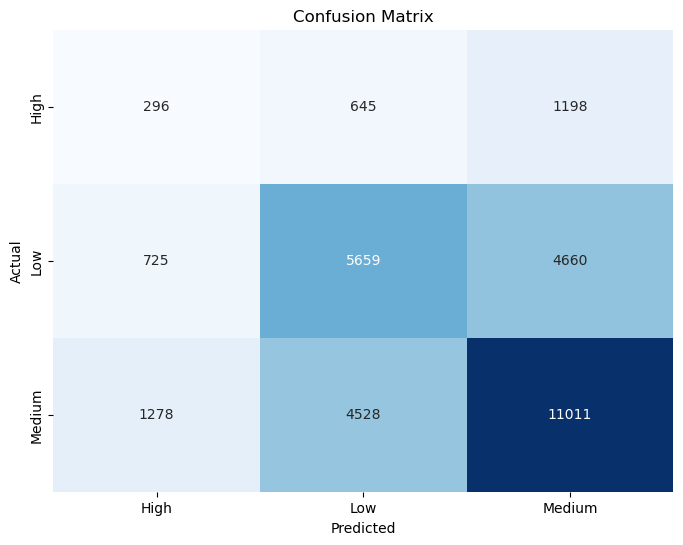

In [17]:
# Random Forest Classifier
print("\nRandom Forest Classifier:")
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
evaluate_model(rf_classifier, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded)


Gradient Boosting Classifier:
Accuracy: 0.5531
Precision: 0.5720803045629398
Recall: 0.5531
F1 Score: 0.5613416644244249

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.17      0.13      2139
           1       0.54      0.48      0.51     11044
           2       0.65      0.65      0.65     16817

    accuracy                           0.55     30000
   macro avg       0.43      0.43      0.43     30000
weighted avg       0.57      0.55      0.56     30000



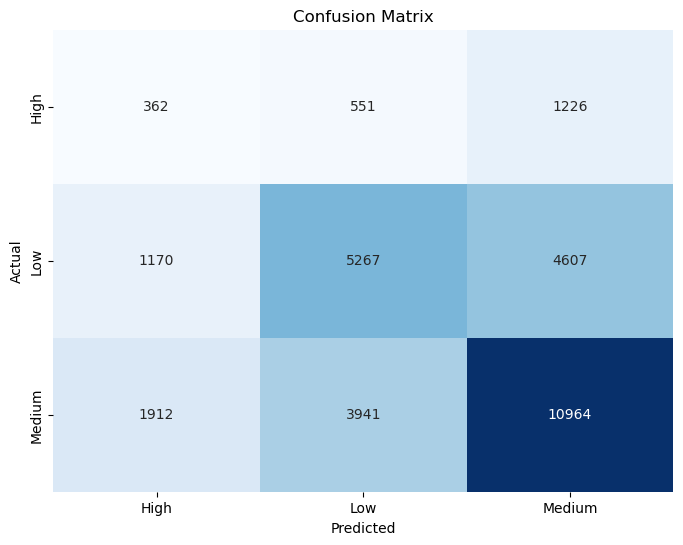

In [18]:
# Gradient Boosting Classifier
print("\nGradient Boosting Classifier:")
gb_classifier = GradientBoostingClassifier(random_state=42)
evaluate_model(gb_classifier, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded)


XGBoost Classifier:
Accuracy: 0.5757333333333333
Precision: 0.5785565578649373
Recall: 0.5757333333333333
F1 Score: 0.5734686413047738

Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.17      0.15      2139
           1       0.56      0.44      0.50     11044
           2       0.65      0.71      0.68     16817

    accuracy                           0.58     30000
   macro avg       0.45      0.44      0.44     30000
weighted avg       0.58      0.58      0.57     30000



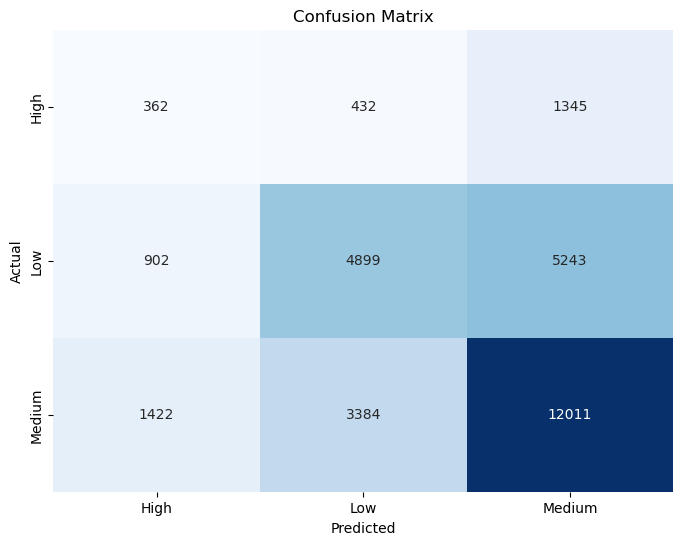

In [19]:
# XGBoost Classifier
print("\nXGBoost Classifier:")
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
evaluate_model(xgb_classifier, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded)


LightGBM Classifier:
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1232
[LightGBM] [Info] Number of data points in the train set: 202263, number of used features: 12
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Accuracy: 0.6185333333333334
Precision: 0.5853009786123126
Recall: 0.6185333333333334
F1 Score: 0.5811774898574634

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.01      0.01      2139
           1       0.59      0.41      0.48     11044
           2       0.63      0.83      0.72     16817

    accuracy                           0.62     30000
   macro avg       0.48      0.42  

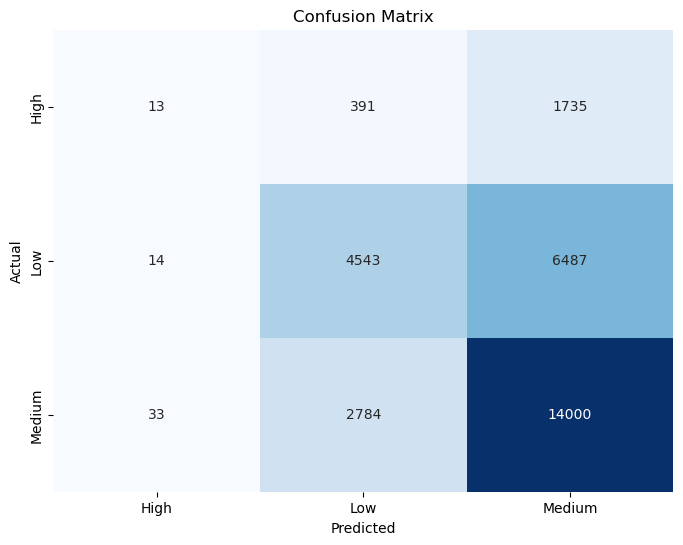

In [20]:
# LightGBM Classifier
print("\nLightGBM Classifier:")
lgbm_classifier = LGBMClassifier(random_state=42)
evaluate_model(lgbm_classifier, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded)


CatBoost Classifier:
Accuracy: 0.6189666666666667
Precision: 0.5877302957371894
Recall: 0.6189666666666667
F1 Score: 0.5842378364231483

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.01      0.02      2139
           1       0.59      0.42      0.49     11044
           2       0.63      0.82      0.72     16817

    accuracy                           0.62     30000
   macro avg       0.49      0.42      0.41     30000
weighted avg       0.59      0.62      0.58     30000



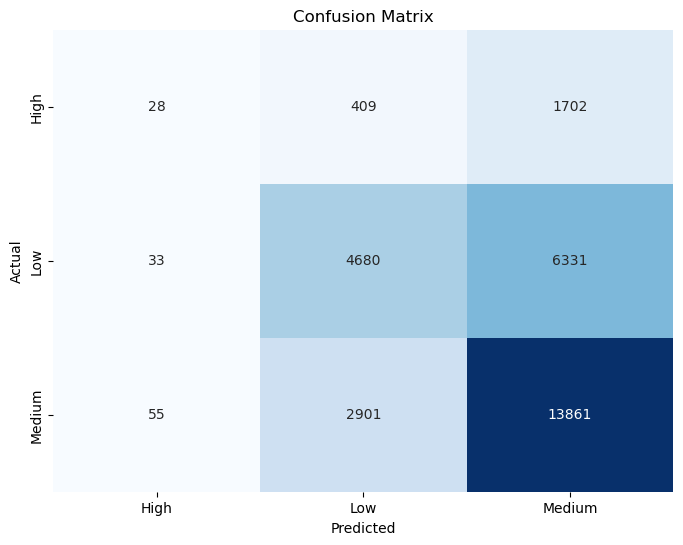

In [21]:
# CatBoost Classifier
print("\nCatBoost Classifier:")
catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)  # verbose=0 to suppress output
evaluate_model(catboost_classifier, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded)


K-Nearest Neighbors Classifier:
Accuracy: 0.4074
Precision: 0.5163847451539697
Recall: 0.4074
F1 Score: 0.4423880708514717

Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.31      0.13      2139
           1       0.45      0.46      0.45     11044
           2       0.62      0.39      0.48     16817

    accuracy                           0.41     30000
   macro avg       0.38      0.38      0.35     30000
weighted avg       0.52      0.41      0.44     30000



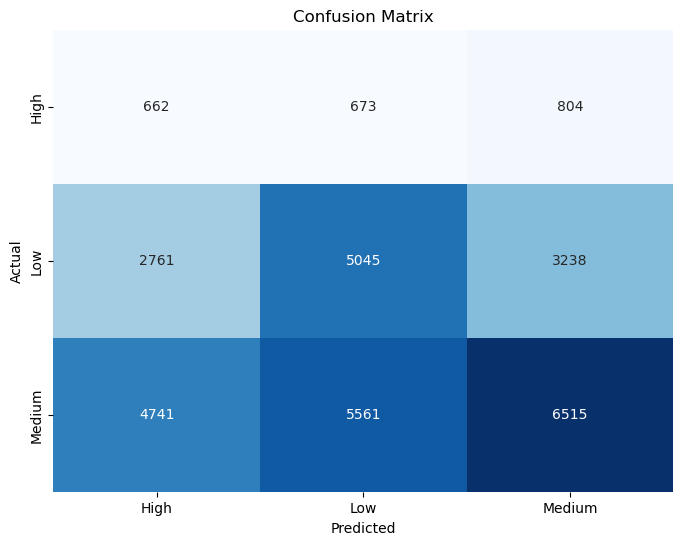

In [22]:

# K-Nearest Neighbors Classifier
print("\nK-Nearest Neighbors Classifier:")
knn_classifier = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn_classifier, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded)

In [23]:
# Initialize CatBoost classifier
catboost_classifier = CatBoostClassifier(task_type="CPU", verbose=0)

# Define the parameter grid
param_grid_catboost = {
    'iterations': [100, 200, 300, 500, 700, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': uniform(0.01, 0.2),
    'l2_leaf_reg': uniform(1, 10),
    'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS'],
    'subsample': uniform(0.5, 0.5),  # Ensure this is in (0, 1] if using Bernoulli or MVS
    'rsm': uniform(0.1, 0.9),  # Ensure this is in (0, 1]
}

# Initialize RandomizedSearchCV
random_search_catboost = RandomizedSearchCV(estimator=catboost_classifier,
                                            param_distributions=param_grid_catboost,
                                            n_iter=50,
                                            scoring='accuracy',
                                            cv=5,
                                            verbose=1,
                                            random_state=42,
                                            n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search_catboost.fit(X_train_selected, y_train_balanced)

# Print the best parameters and best score
print("Best Parameters for CatBoost Classifier:", random_search_catboost.best_params_)
print("Best Score for CatBoost Classifier:", random_search_catboost.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
65 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\igomp\anaconda3\Lib\site-packages\catboost\core.py", line 5220, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\igomp\anaconda3\Lib\site-packages\catboost\core.py", line 2385, 

Best Parameters for CatBoost Classifier: {'bootstrap_type': 'MVS', 'depth': 10, 'iterations': 700, 'l2_leaf_reg': 2.8343478986616377, 'learning_rate': 0.16593820005455387, 'rsm': 0.6371651421518383, 'subsample': 0.7229163764267956}
Best Score for CatBoost Classifier: 0.6793039349978521


# Training Complete data

In [24]:
X_train = train_set.drop(columns=['Risk Factor'])
y_train = train_set['Risk Factor']
X_test = test_set.drop(columns=['Risk Factor'])
y_test = test_set['Risk Factor']

# Define categorical columns for label encoding
label_encoders = {}

# Label Encoding for categorical features
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    X_test[col] = label_encoders[col].transform(X_test[col])

# Label Encoding for target
label_encoder_y = LabelEncoder()
y_train_encoded = label_encoder_y.fit_transform(y_train)
y_test_encoded = label_encoder_y.transform(y_test)

# Standard Scaling for numerical features
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train_encoded)

In [25]:
# Best Parameters found from RandomizedSearchCV
best_params = random_search_catboost.best_params_

# Initialize CatBoost classifier with the best parameters
catboost_classifier = CatBoostClassifier(
    iterations=best_params['iterations'],
    depth=best_params['depth'],
    learning_rate=best_params['learning_rate'],
    l2_leaf_reg=best_params['l2_leaf_reg'],
    bootstrap_type=best_params['bootstrap_type'],
    subsample=best_params['subsample'],
    rsm=best_params['rsm'],
    task_type="CPU",
    verbose=0
)

# Train the CatBoost classifier on the balanced training data
catboost_classifier.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = catboost_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test_encoded, y_pred)
report = classification_report(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.6337777014328979
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.02      0.04    103343
           1       0.61      0.45      0.52    540131
           2       0.65      0.83      0.73    823553

    accuracy                           0.63   1467027
   macro avg       0.52      0.43      0.43   1467027
weighted avg       0.61      0.63      0.60   1467027

Confusion Matrix:
 [[  2192  19077  82074]
 [  1922 244258 293951]
 [  3386 136848 683319]]
